In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
bio1=pd.read_csv("api_data_aadhar_biometric_0_500000.csv")

In [3]:
bio2=pd.read_csv("api_data_aadhar_biometric_500000_1000000.csv")

In [4]:
bio3=pd.read_csv("api_data_aadhar_biometric_1000000_1500000.csv")

In [5]:
bio4=pd.read_csv("api_data_aadhar_biometric_1500000_1861108.csv")

In [6]:
bio_combined=pd.concat([bio1,bio2,bio3,bio4],ignore_index=True)

In [7]:
df=bio_combined.copy()

In [8]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [9]:
df.shape

(1861108, 6)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB


In [11]:
df.describe()

,pincode,bio_age_5_17,bio_age_17_
count,1.861108e+06,1.861108e+06,1.861108e+06
mean,5.217612e+05,1.839058e+01,1.909413e+01
std,1.981627e+05,8.370421e+01,8.806502e+01
min,1.100010e+05,0.000000e+00,0.000000e+00
25%,3.911750e+05,1.000000e+00,1.000000e+00
50%,5.224010e+05,3.000000e+00,4.000000e+00
75%,6.866362e+05,1.100000e+01,1.000000e+01
max,8.554560e+05,8.002000e+03,7.625000e+03


In [12]:
df.isnull().sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(94896)

In [14]:
df[df.duplicated()]

,date,state,district,pincode,bio_age_5_17,bio_age_17_
110000,01-09-2025,Chhattisgarh,Kondagaon,494229,0,1
110001,01-09-2025,Chhattisgarh,Kondagaon,494230,1,0
110002,01-09-2025,Chhattisgarh,Korba,495119,5,35
110003,01-09-2025,Chhattisgarh,Korba,495446,0,16
110004,01-09-2025,Chhattisgarh,Korba,495674,10,34
...,...,...,...,...,...,...
1860707,29-12-2025,Andhra Pradesh,Prakasam,523327,3,7
1860708,29-12-2025,Andhra Pradesh,Prakasam,523368,2,3
1860709,29-12-2025,Andhra Pradesh,Prakasam,523370,1,1
1860710,29-12-2025,Andhra Pradesh,Prakasam,523371,2,1


In [15]:
df = df.drop_duplicates().reset_index(drop=True)
df

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815
...,...,...,...,...,...,...
1766207,29-12-2025,West Bengal,Uttar Dinajpur,733201,4,9
1766208,29-12-2025,West Bengal,Uttar Dinajpur,733213,0,1
1766209,29-12-2025,West Bengal,West Midnapore,721304,0,3
1766210,29-12-2025,West Bengal,West Midnapore,721451,2,0


In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(1766212, 6)

In [18]:
(df == "").sum()

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [19]:
(df.astype(str).apply(lambda x: x.str.strip() == "").sum())

date            0
state           0
district        0
pincode         0
bio_age_5_17    0
bio_age_17_     0
dtype: int64

In [20]:
df[df["pincode"].astype(str).str.len() != 6]   # no invalid pincodes.

,date,state,district,pincode,bio_age_5_17,bio_age_17_


In [21]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


In [22]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')
df

,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,Haryana,Mahendragarh,123029,280,577
1,2025-03-01,Bihar,Madhepura,852121,144,369
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091
3,2025-03-01,Bihar,Bhojpur,802158,256,980
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815
...,...,...,...,...,...,...
1766207,2025-12-29,West Bengal,Uttar Dinajpur,733201,4,9
1766208,2025-12-29,West Bengal,Uttar Dinajpur,733213,0,1
1766209,2025-12-29,West Bengal,West Midnapore,721304,0,3
1766210,2025-12-29,West Bengal,West Midnapore,721451,2,0


In [23]:
df["state"].value_counts()

state
Tamil Nadu                                  174934
Andhra Pradesh                              160202
Uttar Pradesh                               147138
Maharashtra                                 143609
Karnataka                                   135780
West Bengal                                 125274
Kerala                                       93951
Gujarat                                      84630
Odisha                                       83177
Bihar                                        78078
Telangana                                    77850
Rajasthan                                    76698
Madhya Pradesh                               66020
Punjab                                       46414
Assam                                        44418
Jharkhand                                    35054
Chhattisgarh                                 30048
Himachal Pradesh                             28723
Haryana                                      25083
Uttarakhand              

In [24]:
df['state_clean'] = df['state'].str.lower().str.strip().str.replace(r'[^a-z]', '', regex=True)

In [25]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_clean
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,haryana
1,2025-03-01,Bihar,Madhepura,852121,144,369,bihar
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,jammuandkashmir
3,2025-03-01,Bihar,Bhojpur,802158,256,980,bihar
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,tamilnadu


In [26]:
df["district"].value_counts()

district
Pune                 11068
Thrissur             10594
North 24 Parganas    10128
Barddhaman           10079
East Godavari         9872
                     ...  
Mahoba *                 1
BALANGIR                 1
Chandauli *              1
Poonch                   1
Salumbar                 1
Name: count, Length: 974, dtype: int64

In [51]:
df['district_final'] = df['district'].str.lower().str.strip().str.replace(r'[^a-z]', '', regex=True)
df.head()

,date,state_final,district,pincode,bio_age_5_17,bio_age_17_,total_biometric,day,month,year,district_final
0,2025-03-01,haryana,Mahendragarh,123029,280,577,857,1,3,2025,mahendragarh
1,2025-03-01,bihar,Madhepura,852121,144,369,513,1,3,2025,madhepura
2,2025-03-01,jammuandkashmir,Punch,185101,643,1091,1734,1,3,2025,punch
3,2025-03-01,bihar,Bhojpur,802158,256,980,1236,1,3,2025,bhojpur
4,2025-03-01,tamilnadu,Madurai,625514,271,815,1086,1,3,2025,madurai


In [28]:
import difflib

In [29]:
valid_states = [
    "andhrapradesh","arunachalpradesh","assam","bihar","chhattisgarh",
    "goa","gujarat","haryana","himachalpradesh","jharkhand",
    "karnataka","kerala","madhyapradesh","maharashtra","manipur",
    "meghalaya","mizoram","nagaland","odisha","punjab",
    "rajasthan","sikkim","tamilnadu","telangana","tripura",
    "uttarpradesh","uttarakhand","westbengal",
    "jammuandkashmir","delhi"
]

In [30]:
df['state_final'] = df['state_clean'].apply(
    lambda x: difflib.get_close_matches(x, valid_states, n=1, cutoff=0.75)[0]
    if difflib.get_close_matches(x, valid_states, n=1, cutoff=0.75)
    else x
)

In [31]:
df['state_final'].value_counts()

state_final
tamilnadu                            174935
andhrapradesh                        160232
uttarpradesh                         147138
maharashtra                          143609
karnataka                            135780
westbengal                           125422
kerala                                93951
gujarat                               84630
odisha                                83217
bihar                                 78078
telangana                             77850
rajasthan                             76698
madhyapradesh                         66020
punjab                                46414
assam                                 44418
jharkhand                             35054
chhattisgarh                          30053
himachalpradesh                       28723
haryana                               25083
uttarakhand                           21433
jammuandkashmir                       18943
orissa                                12767
delhi               

In [32]:
df['state_final'] = df['state_final'].replace({
    "orissa": "odisha",
    "pondicherry": "puducherry",
    "andamannicobarislands": "andamanandnicobarislands",
    "damananddiu": "dadraandnagarhavelianddamananddiu",
    "damandiu": "dadraandnagarhavelianddamananddiu",
    "dadraandnagarhaveli": "dadraandnagarhavelianddamananddiu",
    "dadranagarhaveli": "dadraandnagarhavelianddamananddiu"
})
df['state_final'].value_counts()

state_final
tamilnadu                            174935
andhrapradesh                        160232
uttarpradesh                         147138
maharashtra                          143609
karnataka                            135780
westbengal                           125422
odisha                                95984
kerala                                93951
gujarat                               84630
bihar                                 78078
telangana                             77850
rajasthan                             76698
madhyapradesh                         66020
punjab                                46414
assam                                 44418
jharkhand                             35054
chhattisgarh                          30053
himachalpradesh                       28723
haryana                               25083
uttarakhand                           21433
jammuandkashmir                       18943
delhi                                  8784
tripura             

In [33]:
df = df[df['state_final'].str.len() > 0]

In [34]:
df.head()

,date,state,district,pincode,bio_age_5_17,bio_age_17_,state_clean,district_clean,state_final
0,2025-03-01,Haryana,Mahendragarh,123029,280,577,haryana,mahendragarh,haryana
1,2025-03-01,Bihar,Madhepura,852121,144,369,bihar,madhepura,bihar
2,2025-03-01,Jammu and Kashmir,Punch,185101,643,1091,jammuandkashmir,punch,jammuandkashmir
3,2025-03-01,Bihar,Bhojpur,802158,256,980,bihar,bhojpur,bihar
4,2025-03-01,Tamil Nadu,Madurai,625514,271,815,tamilnadu,madurai,tamilnadu


In [52]:
df = df[['date', 'state_final',	'district_final',	'pincode','bio_age_5_17','bio_age_17_']]
df.head()

,date,state_final,district_final,pincode,bio_age_5_17,bio_age_17_
0,2025-03-01,haryana,mahendragarh,123029,280,577
1,2025-03-01,bihar,madhepura,852121,144,369
2,2025-03-01,jammuandkashmir,punch,185101,643,1091
3,2025-03-01,bihar,bhojpur,802158,256,980
4,2025-03-01,tamilnadu,madurai,625514,271,815


In [36]:
df["total_biometric"]=df["bio_age_5_17"]+df["bio_age_17_"]

In [37]:
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month   
df['year'] = df['date'].dt.year

In [38]:
df.head()

,date,state_final,district,pincode,bio_age_5_17,bio_age_17_,total_biometric,day,month,year
0,2025-03-01,haryana,Mahendragarh,123029,280,577,857,1,3,2025
1,2025-03-01,bihar,Madhepura,852121,144,369,513,1,3,2025
2,2025-03-01,jammuandkashmir,Punch,185101,643,1091,1734,1,3,2025
3,2025-03-01,bihar,Bhojpur,802158,256,980,1236,1,3,2025
4,2025-03-01,tamilnadu,Madurai,625514,271,815,1086,1,3,2025


In [39]:
df.groupby('pincode')['state_final'].nunique().max()

np.int64(2)

In [40]:
bad_pincodes = df.groupby('pincode')['state_final'].nunique()
bad_pincodes = bad_pincodes[bad_pincodes > 1]
bad_pincodes

pincode
140308    2
140603    2
140901    2
160003    2
160014    2
         ..
756084    2
781131    2
783123    2
783134    2
798628    2
Name: state_final, Length: 702, dtype: int64

In [41]:
df[df['pincode'].isin(bad_pincodes.index)][['pincode', 'state_final']].sort_values('pincode')

,pincode,state_final
1765200,140308,punjab
284608,140308,punjab
1051399,140308,punjab
1078108,140308,punjab
1200490,140308,punjab
...,...,...
1386920,798628,nagaland
1346615,798628,nagaland
153264,798628,nagaland
540257,798628,nagaland


In [42]:
for pin in bad_pincodes.index:
    correct_state = (df[df['pincode'] == pin]['state_final'].value_counts().idxmax())
    df.loc[df['pincode'] == pin, 'state_final'] = correct_state

In [43]:

df.groupby('pincode')['state_final'].nunique().max()  # fixed.

np.int64(1)

In [44]:
df.head()  # data cleaning complete.

,date,state_final,district,pincode,bio_age_5_17,bio_age_17_,total_biometric,day,month,year
0,2025-03-01,haryana,Mahendragarh,123029,280,577,857,1,3,2025
1,2025-03-01,bihar,Madhepura,852121,144,369,513,1,3,2025
2,2025-03-01,jammuandkashmir,Punch,185101,643,1091,1734,1,3,2025
3,2025-03-01,bihar,Bhojpur,802158,256,980,1236,1,3,2025
4,2025-03-01,tamilnadu,Madurai,625514,271,815,1086,1,3,2025


In [45]:
df['total_biometric'].describe()

count    1.766212e+06
mean     3.864828e+01
std      1.664470e+02
min      0.000000e+00
25%      3.000000e+00
50%      8.000000e+00
75%      2.200000e+01
max      1.338100e+04
Name: total_biometric, dtype: float64

In [46]:
sns.set_style("whitegrid")

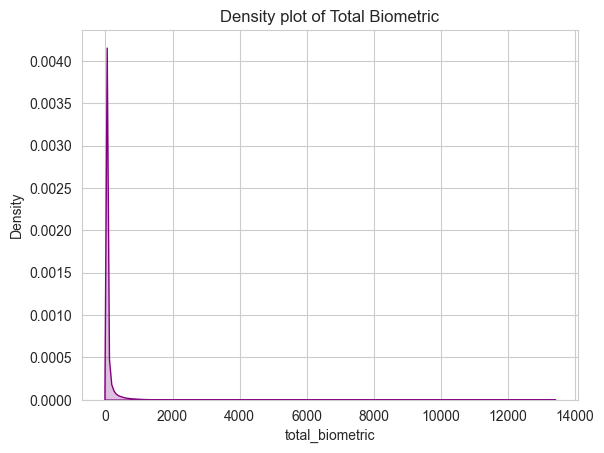

In [47]:
plt.Figure(figsize=(9,6))
sns.kdeplot(df["total_biometric"],fill=True,color="purple")
plt.title("Density plot of Total Biometric")
plt.show()

In [48]:
#age group wise distribution
df[["bio_age_5_17","bio_age_17_"]].describe()

,bio_age_5_17,bio_age_17_
count,1.766212e+06,1.766212e+06
mean,1.894260e+01,1.970568e+01
std,8.581746e+01,9.030576e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,4.000000e+00,4.000000e+00
75%,1.100000e+01,1.000000e+01
max,8.002000e+03,7.625000e+03


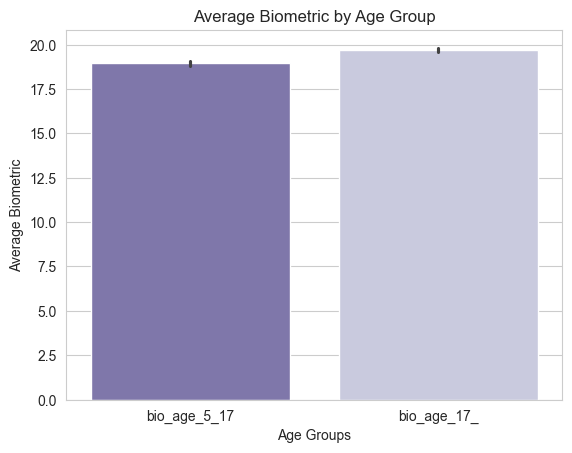

In [49]:
sns.barplot(df[["bio_age_5_17","bio_age_17_"]], palette='Purples_r')
plt.title('Average Biometric by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Average Biometric')
plt.show()